# Study the nn.Embedding and nn.Linear 

https://medium.com/@gautam.e/what-is-nn-embedding-really-de038baadd24

https://www.youtube.com/watch?v=XswEBzNgIYc

In [2]:
# !pip install scipy
import numpy as np
from scipy.sparse import csr_matrix

In [3]:
import torch
import torch.nn as nn

## Check nn.Embedding

In [ ]:
embedding_layer = nn.Embedding(num_embeddings=10, embedding_dim=4)
optimizer = torch.optim.Adam(embedding_layer.parameters(), lr=0.001)
loss_func = nn.MSELoss

In [ ]:
print(embedding_layer)

In [ ]:
embedding_layer.weight.data

In [ ]:
embedding_layer.weight.data[9]

embedding_layer 只是一个look up table, 共有10个index（0~9），每个index对应一个vector (dim =4)

In [ ]:
input_tensor1 = torch.tensor([3,2,0], dtype=torch.long)
result1 = embedding_layer(input_tensor1) # 取出第3,2,0个 embedding
print(result1.shape)
print(result1)

In [ ]:
input_tensor2 = torch.tensor([[1, 3], [0,1]], dtype=torch.long)
result2 = embedding_layer(input_tensor2) # 取出第1,3 matrix，取出第0,1 个matrix，组成第二个matrix，两个matrix合并成2个2x4，即 2x2x4 的矩阵
print(result2.shape)
print(result2)

## Now let us look at nn.Linear
Embedding vs Linear ， definition-wise?
An embedding is the same thing as a linear layer, but works differently in that it does a **lookup** instead of a matrix-vector multiplication.
也就是说，nn.embedding是为了lookup而生的nn layer，普通的nn.Linear则是为了矩阵乘法使用的。
搞这么两套，主要还是为了不同应用场景，导致的存储，运算效率不同

https://www.youtube.com/watch?v=XswEBzNgIYc

## Check nn.Linear

Linear layer in pytorch.nn is actually Fully Connected Layer (FC), which function is Linear transformer, in Tensorflow it is called  Dense Layer 

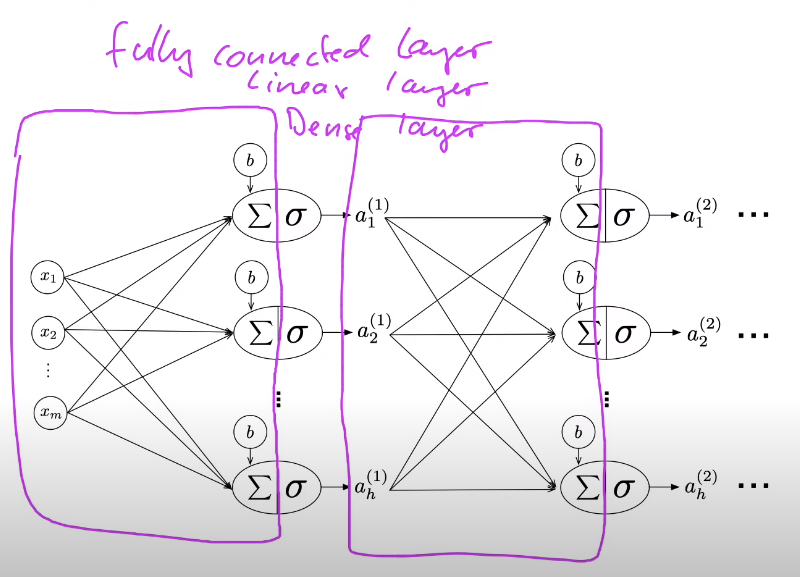


In [4]:
X = torch.arange(50, dtype=torch.float).view(10,5)
X

tensor([[ 0.,  1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.,  9.],
        [10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19.],
        [20., 21., 22., 23., 24.],
        [25., 26., 27., 28., 29.],
        [30., 31., 32., 33., 34.],
        [35., 36., 37., 38., 39.],
        [40., 41., 42., 43., 44.],
        [45., 46., 47., 48., 49.]])

In [5]:
fc_layer = nn.Linear(in_features=5, out_features =3) # actually gen a 3 row, 5 col matrix
print(f"weight:\n{fc_layer.weight}")

print(f"bias:\n{fc_layer.bias}")


weight:
Parameter containing:
tensor([[ 0.1708, -0.4396, -0.2841,  0.0713,  0.3128],
        [ 0.2888,  0.0038, -0.1614,  0.4423, -0.2558],
        [-0.0552,  0.2941, -0.4398,  0.0188,  0.3885]], requires_grad=True)
bias:
Parameter containing:
tensor([-0.2250, -0.0047,  0.0858], requires_grad=True)


In [6]:
print(f"X dim: {X.shape}")
print(f"W dim: {fc_layer.weight.shape}")
print(f"b dim: {fc_layer.bias.size()}")

a = fc_layer(X)

print(f"a dim: {a.shape}")
print(f"a =:\n{a}")


X dim: torch.Size([10, 5])
W dim: torch.Size([3, 5])
b dim: torch.Size([3])
a dim: torch.Size([10, 3])
a =:
tensor([[ 0.2324, -0.0200,  1.1107],
        [-0.6114,  1.5688,  2.1426],
        [-1.4552,  3.1575,  3.1745],
        [-2.2989,  4.7463,  4.2064],
        [-3.1427,  6.3351,  5.2384],
        [-3.9865,  7.9238,  6.2703],
        [-4.8303,  9.5126,  7.3022],
        [-5.6741, 11.1014,  8.3341],
        [-6.5178, 12.6901,  9.3661],
        [-7.3616, 14.2789, 10.3980]], grad_fn=<AddmmBackward0>)


from shape result we would see that the transpose is applied to W-- on theory
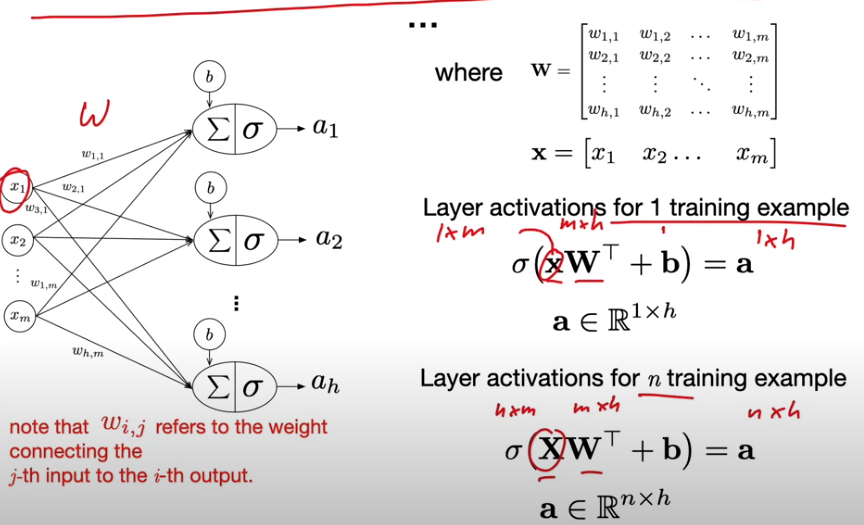

an equalvlent operation: 
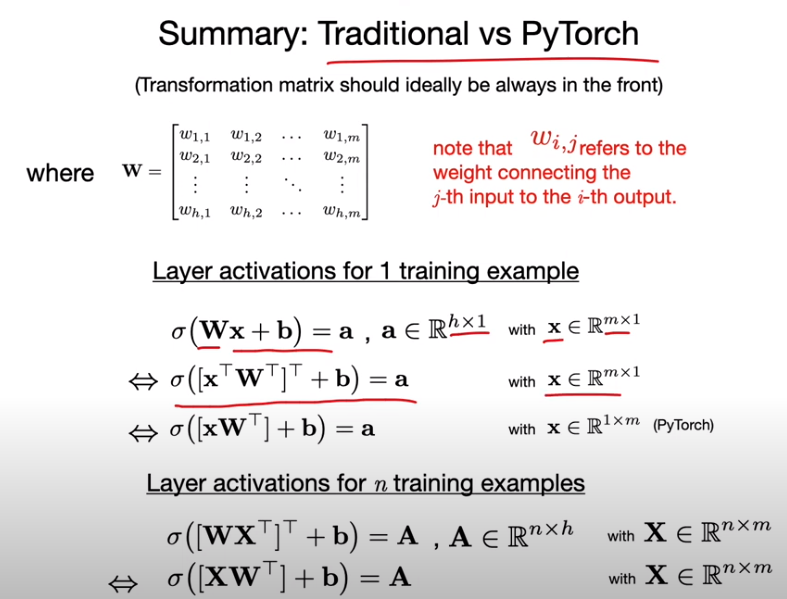

## Check nn.Linear

Linear layer in pytorch.nn is actually Fully Connected Layer (FC), which function is Linear transformer, in Tensorflow it is called  den


### Why use an embedding when we have a linear layer?
An embedding is an efficient alternative to a single linear layer when one has a large number of input features. 
This may happen in natural language processing (NLP) when one is working with text data or in some (language-like) tabular data that is treated as a bag-of-words (BoW). In such cases its also quite common to have the input data available as a sparse matrix (typically a result of an output from sklearn’s CountVectorizer of TfidfVectorizer as a sparse.scipy.csr_matrix) and it is memory-inefficent to convert that in to a dense matrix but really easy to access its non-zero elements and their positions directly instead (using the data and indices attributes).

In [ ]:
# Initialize a sparse matrix: This could be your training set
X_train = csr_matrix(np.array([[1, 0, 1, 0],
                               [0, 0, 1, 1],
                               [1, 1, 1, 0]]))
# Get one row: One sample in the training set
row = X_train.getrow(0)

In [ ]:
row

Now let’s pass the training example row through the linear layer and the embedding so that we get the same result in each case.

In [ ]:
w_linear = nn.Linear(4,3,bias=False)
print(w_linear.weight)

In [ ]:
row_dense = torch.FloatTensor(row.toarray())
print(row_dense)

In [ ]:
prob_linear = w_linear (row_dense)

In [ ]:
print(prob_linear)

In [ ]:
w_embedding = nn.Embedding(4, 3).from_pretrained(w_linear.weight.T)
print(w_embedding.weight)

In [ ]:
print(w_embedding(torch.tensor(row.indices)).sum(0))

The outputs are the same. Yay! 
A couple of observations to keep in mind when you’re using this in your own nn.Module:

1. The embedding weights and the linear layers weights are transposed to each other.
2. The linear layer w_linear does the actual matrix vector multiplication and therefore needs the row to be converted to dense format. In contrast, w_embedding just needed the indices of row to do a lookup. Not only is this faster, but it’s also quite convenient with the scipy.sparse.indices attribute that is available for the sparse matrix!
3. The embedding requires the sum(0). Don’t forget it!
